# Data Cleaning for Text Summarization

Data source:
<br> https://www.kaggle.com/namrarehman/bbc-articles?select=BBCarticles_csv.csv
<br> Code adpated from:
<br> https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/

In [280]:
# Import modules and packages
import nltk
import string
import numpy as np  
import pandas as pd 
import re
from nltk.corpus import stopwords 
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
from keras.preprocessing.text import Tokenizer 

## Read in Text

In [281]:
# load data
#df = pd.read_csv("Reviews.csv",nrows=10000)
df = pd.read_csv("BBCarticles.csv", encoding ='latin1') #2127 dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Summary  2225 non-null   object
 1   Text     2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [282]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [283]:
# Clean Text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    This function takes a string as input, performs these operations: 
        - remove unwanted punctuation, apostrophe 's
        - contraction mapping
        - removes any stopwords and short words
    """ 
    # remove unwanted punctuation
    t1 = re.sub('[(!@"#Â^&*`)]', ' ', text)
    # remove apostrophe 's
    t1 = re.sub(r"'s\b","", t1)
    # contraction mapping
    t1 = ' '.join([contraction_mapping[t] 
                          if t in contraction_mapping else t for t in t1.split(" ")])    
    # Remove stopwords and single letter words
    tokens = [w for w in t1.split() if not w in stop_words and len(w) > 1]      
    t1 = (' '.join(tokens)).strip()
    return t1

cleaned_text = []
for t in df.Text:
    cleaned_text.append(clean_text(t))
df['cleaned_text']=cleaned_text

cleaned_summary = []
for t in df.Summary:
    cleaned_summary.append(clean_text(t))
df['cleaned_summary']=cleaned_summary

# Review the cleaned dataset
df.head()

,Summary,Text,cleaned_text,cleaned_summary
0,"TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09b...","Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is ...","Ad sales boost Time Warner profit Quarterly profits US media giant TimeWarner jumped 76% $1.13bn £600m three months December, $639m year-earlier. The firm, one biggest investors Google, benefited ...","TimeWarner said fourth quarter sales rose 2% $11.1bn $10.9bn.For full-year, TimeWarner posted profit $3.36bn, 27% 2003 performance, revenues grew 6.4% $42.09bn.Quarterly profits US media giant Tim..."
1,The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.China's currency remains pegged to the dol...,Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAn...,Dollar gains Greenspan speech The dollar hit highest level euro almost three months Federal Reserve head said US trade deficit set stabilise. And Alan Greenspan highlighted US government willingne...,The dollar hit highest level euro almost three months Federal Reserve head said US trade deficit set stabilise.China currency remains pegged dollar US currency sharp falls recent months therefore ...
2,Yukos' owner Menatep Group says it will ask Rosneft to repay a loan that Yugansk had secured on its assets.State-owned Rosneft bought the Yugansk unit for $9.3bn in a sale forced by Russia to part...,Yukos unit buyer faces loan claim\n\nThe owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay back a $900m (Â£479m) loan.\n\nState-owned Rosneft bo...,Yukos unit buyer faces loan claim The owners embattled Russian oil giant Yukos ask buyer former production unit pay back $900m £479m loan. State-owned Rosneft bought Yugansk unit $9.3bn sale force...,Yukos' owner Menatep Group says ask Rosneft repay loan Yugansk secured assets.State-owned Rosneft bought Yugansk unit $9.3bn sale forced Russia part settle $27.5bn tax claim Yukos.The sale went ah...
3,"Rod Eddington, BA's chief executive, said the results were ""respectable"" in a third quarter when fuel costs rose by Â£106m or 47.3%.To help offset the increased price of aviation fuel, BA last yea...","High fuel prices hit BA's profits\n\nBritish Airways has blamed high fuel prices for a 40% drop in profits.\n\nReporting its results for the three months to 31 December 2004, the airline made a pr...","High fuel prices hit BA profits British Airways blamed high fuel prices 40% drop profits. Reporting results three months 31 December 2004, airline made pre-tax profit £75m $141m compared £125m yea...","Rod Eddington, BA chief executive, said results respectable third quarter fuel costs rose £106m 47.3%.To help offset increased price aviation fuel, BA last year introduced fuel surcharge passenger..."
4,"Pernod has reduced the debt it took on to fund the Seagram purchase to just 1.8bn euros, while Allied has improved the performance of its fast-food chains.Shares in UK drinks and food firm Allied ...",Pernod takeover talk lifts Domecq\n\nShares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the target of a takeover by France's Pernod Ricard.\n\nReports in th...,Pernod takeover talk lifts Domecq Shares UK drinks food firm Allied Domecq risen speculation could target takeover France Pernod Ricard. Reports Wall Street Journal Financial Times suggested Frenc...,"Pernod reduced debt took fund Seagram purchase 1.8bn euros, Allied improved performance fast-food chains.Shares UK drinks food

In [284]:
# Remove duplicates and drop na
df.drop_duplicates(subset=['cleaned_summary'], inplace=True)
df.dropna(axis=0, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Summary          2080 non-null   object
 1   Text             2080 non-null   object
 2   cleaned_text     2080 non-null   object
 3   cleaned_summary  2080 non-null   object
dtypes: object(4)
memory usage: 81.2+ KB


## EDA

Plot the text and summary lengths to gain overview of distribution, then set the 95th percentile length as maximum length for model.

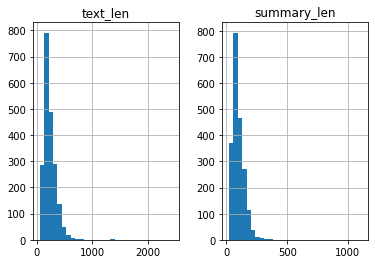

          text_len  summary_len
count  2080.000000  2080.000000
mean    233.956250   100.062019
std     138.501131    62.453581
min      50.000000    21.000000
25%     152.000000    63.000000
50%     204.000000    86.000000
75%     288.000000   123.000000
max    2439.000000  1110.000000
{'95th percentile text length: ': 436, '95th percentile summary length: ': 185}


In [285]:
# Plot word length distribution
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

df['text_len'] = text_word_count
df['summary_len'] = summary_word_count
        
df.hist(bins = 30)
plt.show()

print(df.describe())

print({"95th percentile text length: " : int(np.percentile(df.text_len, 95)),
       "95th percentile summary length: " : int(np.percentile(df.summary_len, 95))})

In [286]:
# Set maximum length of inputs to model
max_text_len = 436
max_summary_len = 183

# Select data with lengths less than or equal to specofied max lengths
df_m = df[df.text_len<=max_text_len][df.summary_len<=max_summary_len] 
print(df_m.describe())

          text_len  summary_len
count  1951.000000  1951.000000
mean    212.015889    90.288570
std      81.196187    35.581114
min      50.000000    21.000000
25%     149.000000    62.000000
50%     196.000000    83.000000
75%     268.000000   114.000000
max     436.000000   183.000000


In [287]:
# Add unique start and end cues to the summary text
df_m['cleaned_summary'] = df_m['cleaned_summary'].apply(lambda x : 'sum_hajime_ '+ x + ' sum_owari_')

In [288]:
# Check text
df_m.iloc[1,3]

'sum_hajime_ The dollar hit highest level euro almost three months Federal Reserve head said US trade deficit set stabilise.China currency remains pegged dollar US currency sharp falls recent months therefore made Chinese export prices highly competitive.Market concerns deficit hit greenback recent months. think chairman taking much sanguine view current account deficit taken time, said Robert Sinche, head currency strategy Bank America New York.The recent falls partly result big budget deficits, well US yawning current account gap, need funded buying US bonds assets foreign firms governments. He taking longer-term view, laying set conditions current account deficit improve year next. sum_owari_'

In [289]:
df_m.head()

,Summary,Text,cleaned_text,cleaned_summary,text_len,summary_len
0,"TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09b...","Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is ...","Ad sales boost Time Warner profit Quarterly profits US media giant TimeWarner jumped 76% $1.13bn £600m three months December, $639m year-earlier. The firm, one biggest investors Google, benefited ...","sum_hajime_ TimeWarner said fourth quarter sales rose 2% $11.1bn $10.9bn.For full-year, TimeWarner posted profit $3.36bn, 27% 2003 performance, revenues grew 6.4% $42.09bn.Quarterly profits US med...",270,94
1,The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.China's currency remains pegged to the dol...,Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAn...,Dollar gains Greenspan speech The dollar hit highest level euro almost three months Federal Reserve head said US trade deficit set stabilise. And Alan Greenspan highlighted US government willingne...,sum_hajime_ The dollar hit highest level euro almost three months Federal Reserve head said US trade deficit set stabilise.China currency remains pegged dollar US currency sharp falls recent month...,241,97
2,Yukos' owner Menatep Group says it will ask Rosneft to repay a loan that Yugansk had secured on its assets.State-owned Rosneft bought the Yugansk unit for $9.3bn in a sale forced by Russia to part...,Yukos unit buyer faces loan claim\n\nThe owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay back a $900m (Â£479m) loan.\n\nState-owned Rosneft bo...,Yukos unit buyer faces loan claim The owners embattled Russian oil giant Yukos ask buyer former production unit pay back $900m £479m loan. State-owned Rosneft bought Yugansk unit $9.3bn sale force...,sum_hajime_ Yukos' owner Menatep Group says ask Rosneft repay loan Yugansk secured assets.State-owned Rosneft bought Yugansk unit $9.3bn sale forced Russia part settle $27.5bn tax claim Yukos.The ...,164,70
3,"Rod Eddington, BA's chief executive, said the results were ""respectable"" in a third quarter when fuel costs rose by Â£106m or 47.3%.To help offset the increased price of aviation fuel, BA last yea...","High fuel prices hit BA's profits\n\nBritish Airways has blamed high fuel prices for a 40% drop in profits.\n\nReporting its results for the three months to 31 December 2004, the airline made a pr...","High fuel prices hit BA profits British Airways blamed high fuel prices 40% drop profits. Reporting results three months 31 December 2004, airline made pre-tax profit £75m $141m compared £125m yea...","sum_hajime_ Rod Eddington, BA chief executive, said results respectable third quarter fuel costs rose £106m 47.3%.To help offset increased price aviation fuel, BA last year introduced fuel surchar...",272,130
4,"Pernod has reduced the debt it took on to fund the Seagram purchase to just 1.8bn euros, while Allied has improved the performance of its fast-food chains.Shares in UK drinks and food firm Allied ...",Pernod takeover talk lifts Domecq\n\nShares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the target of a takeover by France's Pernod Ricard.\n\nReports in th...,Pernod takeover talk lifts Domecq Shares UK drinks food firm Allied Domecq risen speculation could target takeover France Pernod Ricard. Reports Wall Street Journal Financial Times suggested Frenc...,"sum_hajime_ Pernod reduced debt took fund Seagram purchase 1.8bn euros, Alli

In [290]:
df_m.to_csv('data.csv')  